# Implementation of K-means clustering

A synthetic dataset consisting of several customer groups, the only parameters viewed are their income and how much money they have spent.

In [13]:
## Imports
import numpy as np
import pandas as pd
import pylab as pb
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
## Functions

def getCustomerGroup(mean,cov,noCustomers):
    """Returns a numpyarray with customers using specified parameters from a Gaussian distribution.
    mean is a 1x2 vector with the mean of [income, spendings],
    cov  is a 2x2 vector with the covariance of the distribution,
    noCustomers is the numer of customers in this group.
    """
    income, spendings = np.random.multivariate_normal(mean,cov,noCustomers).T;
    return np.array([income,spendings]);
    

# Create the data.

We want several customer groups. Some with low income and low spending, some with high income high spending and a micture between these two.

In [3]:
## Create the data

# Low income, Low spending
income = 210; spendings = 120; incomeVariance = 100; spendingsVariance = 100;

mean = [income,spendings];
cov  = [[incomeVariance, 0],
        [0, spendingsVariance]];
amountOfCustomers = 900;

lowIncome_lowSpending_Group = np.around(getCustomerGroup(mean, cov, amountOfCustomers),decimals=1);



# Low income, High spending
income = 200; spendings = 200; incomeVariance = 100; spendingsVariance = 130;

mean = [income,spendings];
cov  = [[incomeVariance, 0],
        [0, spendingsVariance]];
amountOfCustomers = 600;

lowIncome_highSpending_Group = np.around(getCustomerGroup(mean, cov, amountOfCustomers),decimals=1);


# Medium income, Medium spending
income = 230; spendings = 150; incomeVariance = 130; spendingsVariance = 180;

mean = [income,spendings];
cov  = [[incomeVariance, 0],
        [0, spendingsVariance]];
amountOfCustomers = 1500;

mediumIncome_mediumSpending_Group = np.around(getCustomerGroup(mean, cov, amountOfCustomers),decimals=1);


# High income, Low spending
income = 260; spendings = 150; incomeVariance = 100; spendingsVariance = 200;

mean = [income,spendings];
cov  = [[incomeVariance, 0],
        [0, spendingsVariance]];
amountOfCustomers = 400;

highIncome_lowSpending_Group = np.around(getCustomerGroup(mean, cov, amountOfCustomers),decimals=1);


# High income, High spending
income = 260; spendings = 260; incomeVariance = 100; spendingsVariance = 250;

mean = [income,spendings];
cov  = [[incomeVariance, 0],
        [0, spendingsVariance]];
amountOfCustomers = 700;

highIncome_highSpending_Group = np.around(getCustomerGroup(mean, cov, amountOfCustomers),decimals=1);


# Create pandas dataframe
customerGroups = pd.DataFrame(np.vstack((lowIncome_lowSpending_Group.T,  lowIncome_highSpending_Group.T,
                                         highIncome_lowSpending_Group.T, highIncome_highSpending_Group.T,
                                         mediumIncome_mediumSpending_Group.T)))

customerGroups.rename({0:'Income', 1:'Spendings',}, axis='columns',inplace=True)
customerGroups.index.names = ['Customer ID']

print("\nExample of 5 customers at random.")
customerGroups.sample(5)


Example of 5 customers at random.


,Income,Spendings
Customer ID,,
1407,195.7,205.8
2651,246.1,149.5
1501,255.2,184.9
2929,217.8,150.9
2592,246.8,285.2


# Visualization of the generated data-set

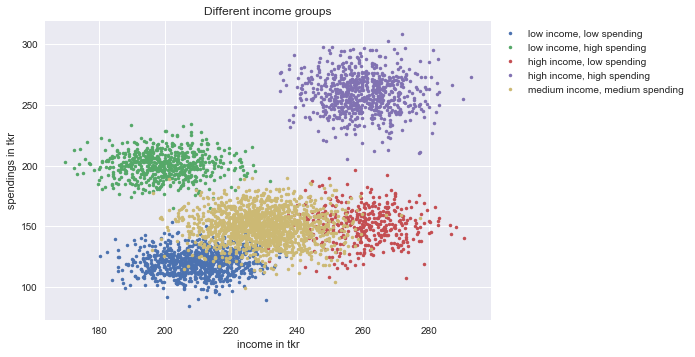



Information about the distribution of all groups together.



,count,mean,std,min,25%,50%,75%,max
Income,4100.0,229.023902,23.980788,169.8,210.000,226.5,249.100,292.7
Spendings,4100.0,169.628366,49.202736,84.0,133.075,153.2,199.525,308.3


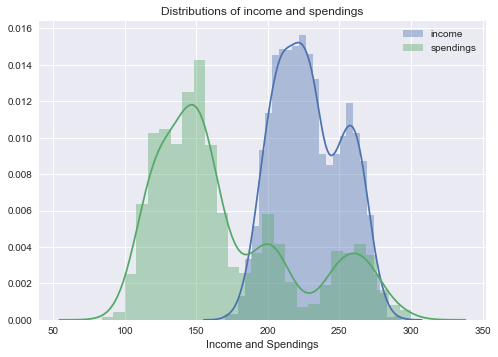

In [8]:
## Plotting the data-set

pb.rcParams['figure.figsize'] = (13, 7)
pb.style.use('seaborn')

pb.plot(lowIncome_lowSpending_Group[0],  lowIncome_lowSpending_Group[1],
        '.', label="low income, low spending")

pb.plot(lowIncome_highSpending_Group[0], lowIncome_highSpending_Group[1],
        '.', label="low income, high spending")

pb.plot(highIncome_lowSpending_Group[0], highIncome_lowSpending_Group[1],
        '.', label="high income, low spending")

pb.plot(highIncome_highSpending_Group[0], highIncome_highSpending_Group[1],
        '.', label="high income, high spending")

pb.plot(mediumIncome_mediumSpending_Group[0], mediumIncome_mediumSpending_Group[1],
        '.', label="medium income, medium spending")

pb.xlabel('income in tkr'); pb.ylabel('spendings in tkr')
pb.title('Different income groups')
pb.legend(bbox_to_anchor=(1, 1))
pb.show()

plot_income = sns.distplot(customerGroups["Income"],label="income")
plot_spend = sns.distplot(customerGroups["Spendings"],label="spendings")
pb.xlabel('Income and Spendings')
pb.title("Distributions of income and spendings")
pb.legend()

## Display some information about the whole dataset

print("\n\nInformation about the distribution of all groups together.\n")
customerGroups.describe().transpose()

# Visualization of the data-set we will work on

The labels of the different groups are now unknown.

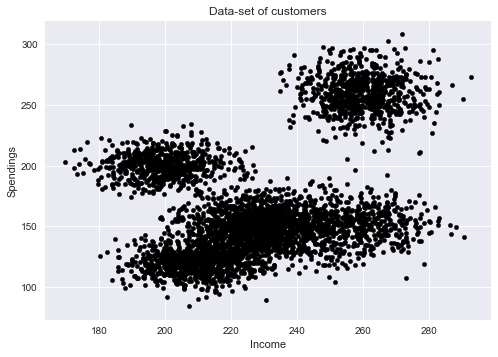

In [9]:
customerGroups.plot.scatter(x='Income',y='Spendings',c='Black')
pb.title("Data-set of customers")
pb.show()

# Finding optimal model parameters
Usually the amount of clusters needed is not clear, so we need to find the optimal amount of clusters. 
This does not always correspond to the underlying amount of clusters.

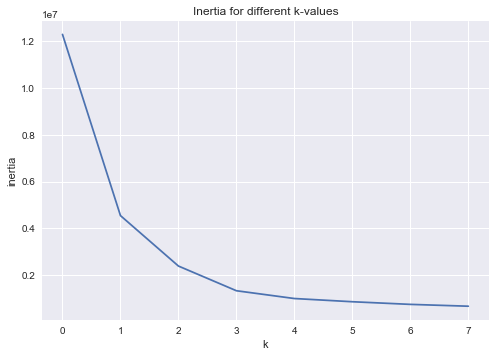


We can see that a value between 3-5 clusters seems like a good choice for this data-set. 
We can fit the model to these three values and see in the end which performs best based on a visual inspection.


In [28]:
## Find the best parameters (i.e. amount of clusters)

# Loop over several cases and check their inertia
inertia = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(customerGroups)
    inertia.append(kmeans.inertia_)

pb.plot(inertia)
pb.title("Inertia for different k-values")
pb.xlabel("k")
pb.ylabel("inertia")
pb.show()

print("\nWe can see that a value between 3-5 clusters seems like a good choice for this data-set. \n"
      "We can fit the model to these three values and see in the end which performs best based on a visual inspection.")

# Fitting the model

We fit the kmeans by using three different k-values.

In [44]:
## Fit using differnt k-values

# k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(customerGroups)
labels = kmeans_3.labels_
results = customerGroups[labels]
results

KeyError: '[0 0 0 ... 0 0 2] not in index'

In [40]:
customerGroups.index

RangeIndex(start=0, stop=4100, step=1, name=u'Customer ID')